In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as patches
import os

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 24

# Results from MUTUAL (Figure 6)

## Battery = Linear | Performance = MVA | Reward = W/O

In [3]:
DIR = 'varying_cores/'
ID = 7
COLS = ['N1', 'N2', 'cores', 'X1', 'X2', 'U', 'P', 'V', 'L', 'R', 'C', 'Ca', 'Cb', 'analysisTime']

df1 = pd.read_csv('../results/' + DIR + 'results' + str(ID) + '_mix.csv', names=COLS)
df1['T'] = df1['L'].cumsum()
df1['RewTot'] = df1['R'].cumsum()

dfList = [df1]
otherDfList = sorted([f for f in os.listdir('../results/' + DIR) if str(ID) + '_' in f and 'mix' not in f], key=lambda x:int(x.split('_')[2].split('-')[0]))
for f in otherDfList:
    if str(ID) + '_' in f and 'mix' not in f:
        dfTmp = pd.read_csv('../results/' + DIR + f, names=COLS)
        dfTmp['T'] = dfTmp['L'].cumsum()
        dfTmp['RewTot'] = dfTmp['R'].cumsum()
        dfList.append(dfTmp)

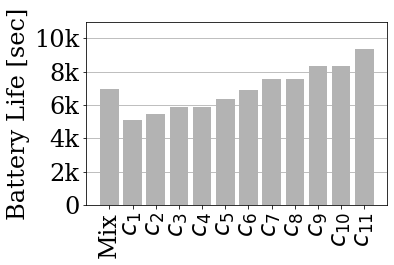

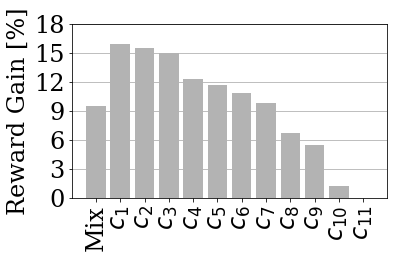

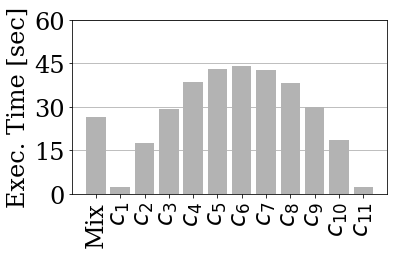

In [4]:
SAVEFIG = False

FULL_AVAIL = 6.45
LABELS = ['Mix'] + [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]


fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['T'].iloc[-1] for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(range(0, 10001, 2000), ['0', '2k', '4k', '6k', '8k', '10k'])
plt.ylim(0, 11000)
plt.ylabel('Battery Life [sec]')
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'battery_life_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['R'].sum() for df in dfList]
minRew = min([y/10**6 for y in yAxis])
yAxisNorm = [(y/10**6-minRew)*100/minRew for y in yAxis]
bars = ax.bar(xAxis, [y for y in yAxisNorm], color='#b3b3b3')
labels = ['{:.1f}%'.format((b.get_height()-minRew)*100/minRew) for b in bars]
plt.xticks(rotation=90)
plt.yticks(range(0, 19, 3))
plt.ylabel('Reward Gain [%]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'total_reward_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['analysisTime'].sum() for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(range(0, 61, 15))
plt.ylabel('Exec. Time [sec]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'analysis_time_' + str(ID) + '.pdf')
plt.show()

## Battery = KiBaM | Performance = MVA | Reward = W/O

In [5]:
DIR = 'varying_cores/'
ID = 8
COLS = ['N1', 'N2', 'cores', 'X1', 'X2', 'U', 'P', 'V', 'L', 'R', 'C', 'Ca', 'Cb', 'analysisTime']

df1 = pd.read_csv('../results/' + DIR + 'results' + str(ID) + '_mix.csv', names=COLS)
df1['T'] = df1['L'].cumsum()
df1['RewTot'] = df1['R'].cumsum()

dfList = [df1]
otherDfList = sorted([f for f in os.listdir('../results/' + DIR) if str(ID) + '_' in f and 'mix' not in f], key=lambda x:int(x.split('_')[2].split('-')[0]))
for f in otherDfList:
    if str(ID) + '_' in f and 'mix' not in f:
        dfTmp = pd.read_csv('../results/' + DIR + f, names=COLS)
        dfTmp['T'] = dfTmp['L'].cumsum()
        dfTmp['RewTot'] = dfTmp['R'].cumsum()
        dfList.append(dfTmp)

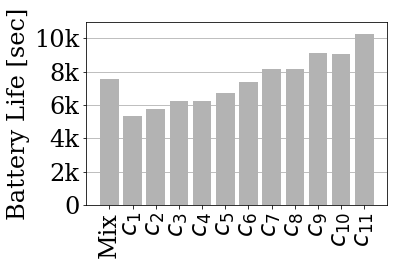

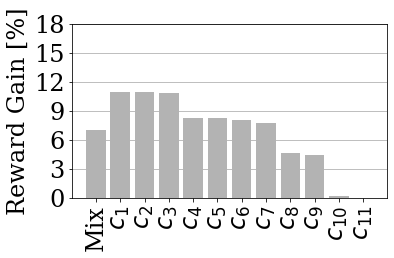

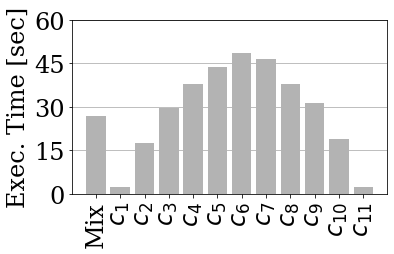

In [6]:
SAVEFIG = False

FULL_AVAIL = 6.45
LABELS = ['Mix'] + [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]


fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['T'].iloc[-1] for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(range(0, 10001, 2000), ['0', '2k', '4k', '6k', '8k', '10k'])
plt.ylim(0, 11000)
plt.ylabel('Battery Life [sec]')
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'battery_life_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['R'].sum() for df in dfList]
minRew = min([y/10**6 for y in yAxis])
yAxisNorm = [(y/10**6-minRew)*100/minRew for y in yAxis]
bars = ax.bar(xAxis, [y for y in yAxisNorm], color='#b3b3b3')
labels = ['{:.1f}%'.format((b.get_height()-minRew)*100/minRew) for b in bars]
plt.xticks(rotation=90)
plt.yticks(range(0, 19, 3))
plt.ylabel('Reward Gain [%]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'total_reward_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['analysisTime'].sum() for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(range(0, 61, 15))
plt.ylabel('Exec. Time [sec]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'analysis_time_' + str(ID) + '.pdf')
plt.show()

## Battery = KiBaM | Performance = AMVA | Reward = W/O

In [7]:
DIR = 'varying_cores/'
ID = 9
COLS = ['N1', 'N2', 'cores', 'X1', 'X2', 'U', 'P', 'V', 'L', 'R', 'C', 'Ca', 'Cb', 'analysisTime']

df1 = pd.read_csv('../results/' + DIR + 'results' + str(ID) + '_mix.csv', names=COLS)
df1['T'] = df1['L'].cumsum()
df1['RewTot'] = df1['R'].cumsum()

dfList = [df1]
otherDfList = sorted([f for f in os.listdir('../results/' + DIR) if str(ID) + '_' in f and 'mix' not in f], key=lambda x:int(x.split('_')[2].split('-')[0]))
for f in otherDfList:
    if str(ID) + '_' in f and 'mix' not in f:
        dfTmp = pd.read_csv('../results/' + DIR + f, names=COLS)
        dfTmp['T'] = dfTmp['L'].cumsum()
        dfTmp['RewTot'] = dfTmp['R'].cumsum()
        dfList.append(dfTmp)

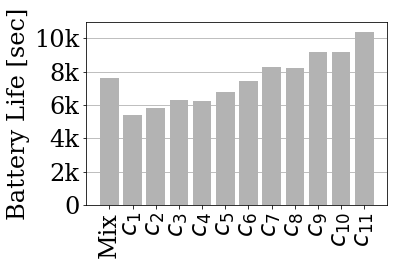

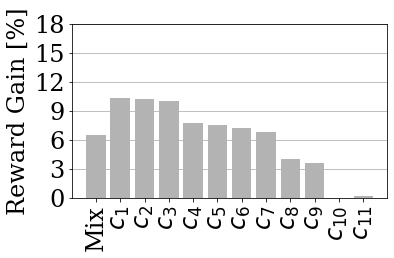

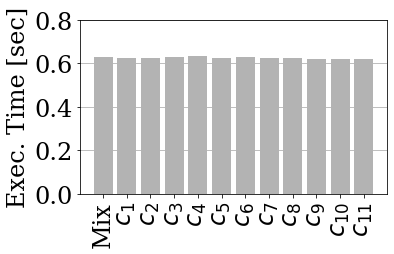

In [8]:
SAVEFIG = False

FULL_AVAIL = 6.45
LABELS = ['Mix'] + [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]


fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['T'].iloc[-1] for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(range(0, 10001, 2000), ['0', '2k', '4k', '6k', '8k', '10k'])
plt.ylim(0, 11000)
plt.ylabel('Battery Life [sec]')
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'battery_life_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['R'].sum() for df in dfList]
minRew = min([y/10**6 for y in yAxis])
yAxisNorm = [(y/10**6-minRew)*100/minRew for y in yAxis]
bars = ax.bar(xAxis, [y for y in yAxisNorm], color='#b3b3b3')
labels = ['{:.1f}%'.format((b.get_height()-minRew)*100/minRew) for b in bars]
plt.xticks(rotation=90)
plt.yticks(range(0, 19, 3))
plt.ylabel('Reward Gain [%]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'total_reward_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['analysisTime'].sum() for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 0.81, 0.2))
plt.ylabel('Exec. Time [sec]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'analysis_time_' + str(ID) + '.pdf')
plt.show()

## Battery = KiBaM | Performance = AMVA | Reward = W/

In [9]:
DIR = 'varying_cores/'
ID = 10
COLS = ['N1', 'N2', 'cores', 'X1', 'X2', 'U', 'P', 'V', 'L', 'R', 'C', 'Ca', 'Cb', 'analysisTime']

df1 = pd.read_csv('../results/' + DIR + 'results' + str(ID) + '_mix.csv', names=COLS)
df1['T'] = df1['L'].cumsum()
df1['RewTot'] = df1['R'].cumsum()

dfList = [df1]
otherDfList = sorted([f for f in os.listdir('../results/' + DIR) if str(ID) + '_' in f and 'mix' not in f], key=lambda x:int(x.split('_')[2].split('-')[0]))
for f in otherDfList:
    if str(ID) + '_' in f and 'mix' not in f:
        dfTmp = pd.read_csv('../results/' + DIR + f, names=COLS)
        dfTmp['T'] = dfTmp['L'].cumsum()
        dfTmp['RewTot'] = dfTmp['R'].cumsum()
        dfList.append(dfTmp)

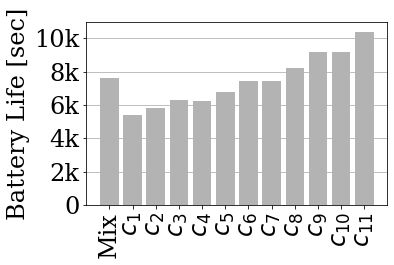

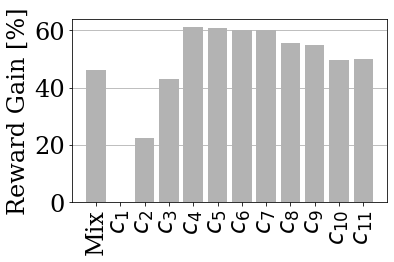

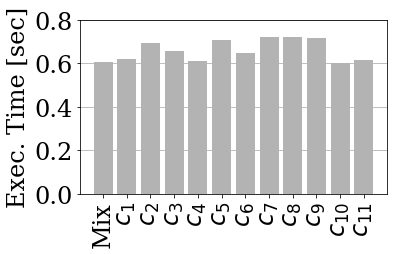

In [10]:
SAVEFIG = False

FULL_AVAIL = 6.45
LABELS = ['Mix'] + [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]


fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['T'].iloc[-1] for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(range(0, 10001, 2000), ['0', '2k', '4k', '6k', '8k', '10k'])
plt.ylim(0, 11000)
plt.ylabel('Battery Life [sec]')
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'battery_life_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['R'].sum() for df in dfList]
minRew = min([y/10**6 for y in yAxis])
yAxisNorm = [(y/10**6-minRew)*100/minRew for y in yAxis]
bars = ax.bar(xAxis, [y for y in yAxisNorm], color='#b3b3b3')
labels = ['{:.1f}%'.format((b.get_height()-minRew)*100/minRew) for b in bars]
plt.xticks(rotation=90)
plt.yticks(range(0, 71, 20))
plt.ylabel('Reward Gain [%]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'total_reward_' + str(ID) + '.pdf')
plt.show()


fig, ax = plt.subplots()
ax.grid(axis='x')
ax.set_axisbelow(True)
xAxis = [l for l in LABELS]
yAxis = [df['analysisTime'].sum() for df in dfList]
bars = ax.bar(xAxis, yAxis, color='#b3b3b3')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 0.81, 0.2))
plt.ylabel('Exec. Time [sec]')
plt.grid()
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'analysis_time_' + str(ID) + '.pdf')
plt.show()

# Validation of MUTUAL (Section 4.3)

## MUTUAL = Linear + MVA + W/O vs. Integrated Model

In [11]:
DIR = 'varying_cores/'
ID = 7
COLS = ['N1', 'N2', 'cores', 'X1', 'X2', 'U', 'P', 'V', 'L', 'R', 'C', 'Ca', 'Cb', 'analysisTime']

df1 = pd.read_csv('../results/' + DIR + 'results' + str(ID) + '_mix.csv', names=COLS)
df1['T'] = df1['L'].cumsum()
df1['RewTot'] = df1['R'].cumsum()

dfList = [df1]
otherDfList = sorted([f for f in os.listdir('../results/' + DIR) if str(ID) + '_' in f and 'mix' not in f], key=lambda x:int(x.split('_')[2].split('-')[0]))
for f in otherDfList:
    if str(ID) + '_' in f and 'mix' not in f:
        dfTmp = pd.read_csv('../results/' + DIR + f, names=COLS)
        dfTmp['T'] = dfTmp['L'].cumsum()
        dfTmp['RewTot'] = dfTmp['R'].cumsum()
        dfList.append(dfTmp)

In [12]:
df = pd.read_excel('../QPN_simulation/sim_results.ods', engine='odf')


X1List = []
X2List = []
LList = []
TList = []
for dfTmp in dfList[1:]:
    X1List.append(dfTmp['X1'].iloc[-1])
    X2List.append(dfTmp['X2'].iloc[-1])
    LList.append(dfTmp['T'].iloc[-1])
    TList.append(dfTmp['analysisTime'].sum())
df['X1_mva+linear'] = X1List
df['X2_mva+linear'] = X2List
df['L_mva+linear'] = LList
df['Time_mva+linear'] = TList


for m in ['X1', 'X2', 'L']:
    df[m+'_mape'] = np.abs(df[m+'_mean'] - df[m+'_mva+linear']) * 100 / df[m+'_mean']
    df[m+'_mape'].fillna(0.0, inplace=True)

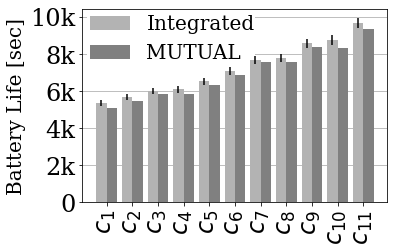

In [13]:
SAVEFIG = False

WIDTH = 0.4
SHIFTS = [-WIDTH/2, WIDTH/2]
X_AXIS_NAMES = [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]
LEGEND = ['Integrated', 'MUTUAL']
COLORS = ['#b3b3b3', '#808080']
METRIC = 'L'

fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = range(df.shape[0])
for attr, shft, col, lgnd in zip([METRIC+'_mean', METRIC+'_mva+linear'], SHIFTS, COLORS, LEGEND):
    if attr == METRIC+'_mean':
        bars = ax.bar([x+shft for x in xAxis], df[attr], yerr=(df[METRIC+'_upper'] - df[METRIC+'_lower'])/2, width=WIDTH, color=col, label=lgnd)
    else:
        bars = ax.bar([x+shft for x in xAxis], df[attr], width=WIDTH, color=col, label=lgnd)
plt.xticks(xAxis, X_AXIS_NAMES, rotation=90)
plt.yticks(range(0, 10001, 2000), ['0', '2k', '4k', '6k', '8k', '10k'])
plt.ylabel('Battery Life [sec]', size=20)
plt.legend(loc=(0.0,0.68), frameon=False, fontsize=20)

rect = patches.Rectangle((-0.75, 7710), 6.5, 2500, linewidth=1, edgecolor='w', facecolor='w')
ax.add_patch(rect)

plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'battery_life_compare.pdf')
plt.show()

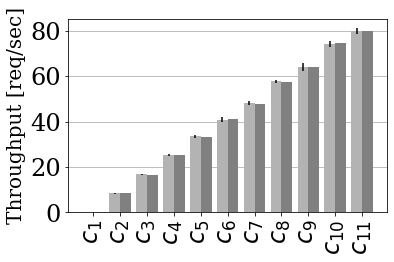

In [14]:
SAVEFIG = False

WIDTH = 0.4
SHIFTS = [-WIDTH/2, WIDTH/2]
X_AXIS_NAMES = [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]
LEGEND = ['Integrated', 'Modular']
COLORS = ['#b3b3b3', '#808080']
METRIC = 'X1'

fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = range(df.shape[0])
for attr, shft, col, lgnd in zip([METRIC+'_mean', METRIC+'_mva+linear'], SHIFTS, COLORS, LEGEND):
    if attr == METRIC+'_mean':
        bars = ax.bar([x+shft for x in xAxis], df[attr], yerr=(df[METRIC+'_upper'] - df[METRIC+'_lower'])/2, width=WIDTH, color=col, label=lgnd)
    else:
        bars = ax.bar([x+shft for x in xAxis], df[attr], width=WIDTH, color=col, label=lgnd)
plt.xticks(xAxis, X_AXIS_NAMES, rotation=90)
plt.yticks(range(0,81,20))
plt.ylabel('Throughput [req/sec]', size=20)
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'X1_compare.pdf')
plt.show()

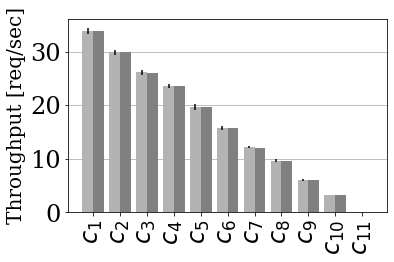

In [15]:
SAVEFIG = False

WIDTH = 0.4
SHIFTS = [-WIDTH/2, WIDTH/2]
X_AXIS_NAMES = [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]
LEGEND = ['Integrated', 'Modular']
COLORS = ['#b3b3b3', '#808080']
METRIC = 'X2'

fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = range(df.shape[0])
for attr, shft, col, lgnd in zip([METRIC+'_mean', METRIC+'_mva+linear'], SHIFTS, COLORS, LEGEND):
    if attr == METRIC+'_mean':
        bars = ax.bar([x+shft for x in xAxis], df[attr], yerr=(df[METRIC+'_upper'] - df[METRIC+'_lower'])/2, width=WIDTH, color=col, label=lgnd)
    else:
        bars = ax.bar([x+shft for x in xAxis], df[attr], width=WIDTH, color=col, label=lgnd)
plt.xticks(xAxis, X_AXIS_NAMES, rotation=90)
plt.yticks(range(0,31,10))
plt.ylabel('Throughput [req/sec]', size=20)
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'X2_compare.pdf')
plt.show()

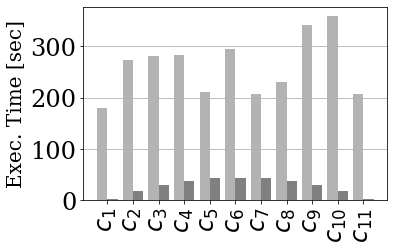

In [16]:
SAVEFIG = False

WIDTH = 0.4
SHIFTS = [-WIDTH/2, WIDTH/2]
X_AXIS_NAMES = [r'$c_{' + str(i) + '}$' for i in range(1,12,1)]
LEGEND = ['Integrated', 'Modular']
COLORS = ['#b3b3b3', '#808080']
METRIC = 'Time'

fig, ax = plt.subplots()
ax.grid(axis='y')
ax.set_axisbelow(True)
xAxis = range(df.shape[0])
for attr, shft, col, lgnd in zip([METRIC, METRIC+'_mva+linear'], SHIFTS, COLORS, LEGEND):
    bars = ax.bar([x+shft for x in xAxis], df[attr], width=WIDTH, color=col, label=lgnd)
plt.xticks(xAxis, X_AXIS_NAMES, rotation=90)
plt.ylabel('Exec. Time [sec]', size=20)
plt.tight_layout()
if SAVEFIG:
    plt.savefig('../images/' + DIR + 'execution_time_compare.pdf')
plt.show()